In [43]:
import pandas as pd
data = pd.read_csv('../Data/diamonds.csv')
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [44]:
data.shape

(53940, 10)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Missing values

In [46]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [47]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [48]:
import pandas as pd

# Read the CSV file into a DataFrame

# Remove rows where x == 0
data = data[data['x'] != 0]

# Save the cleaned DataFrame back to a CSV file
data.to_csv('your_file_cleaned.csv', index=False)


In [49]:
data.describe()

carat         depth         table         price             x  \
count  53932.000000  53932.000000  53932.000000  53932.000000  53932.000000   
mean       0.797879     61.749336     57.457029   3932.136079      5.732007   
std        0.473986      1.432514      2.234064   3988.734835      1.119670   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.750000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53932.000000  53932.000000  
mean       5.735254      3.539259  
std        1.140343      0.704434  
min        3.680000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [50]:
data.shape

(53932, 10)

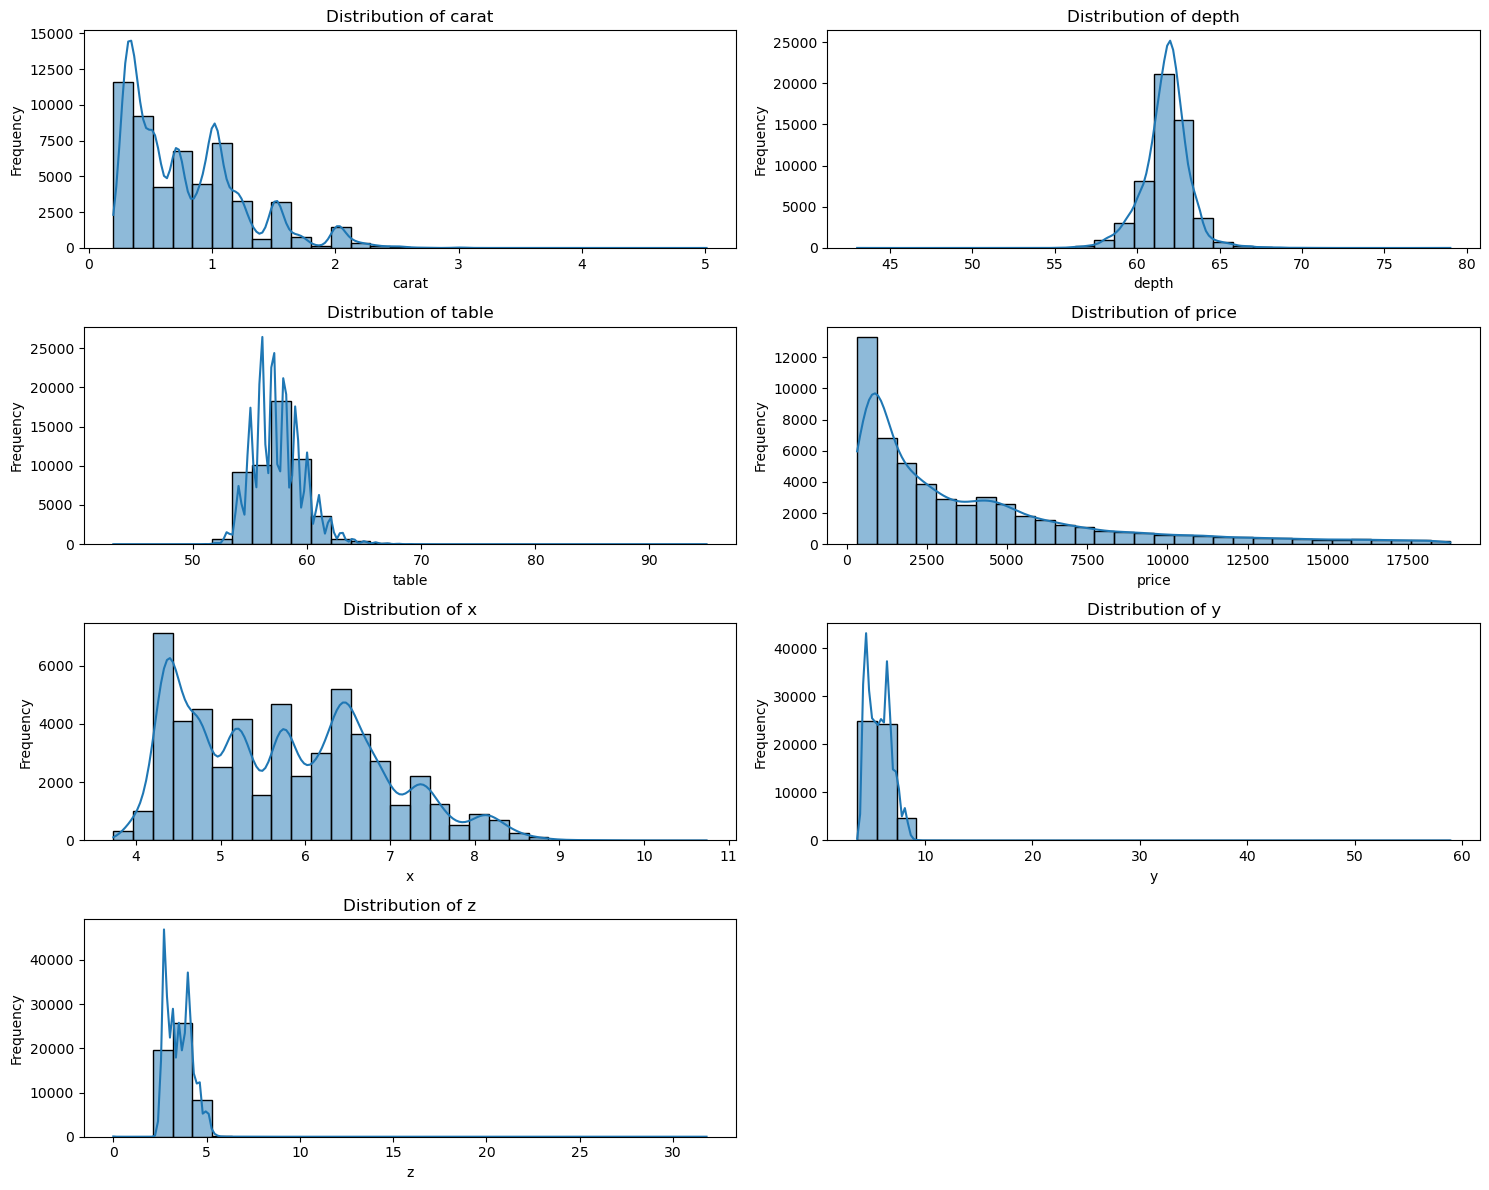

In [51]:
# Histrograms of all 
# Load the diamonds dataset
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to create histograms
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Set the size of the plot grid
plt.figure(figsize=(15, 12))

# Loop through each feature and create a histogram
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/Users/victorwintherlarsen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


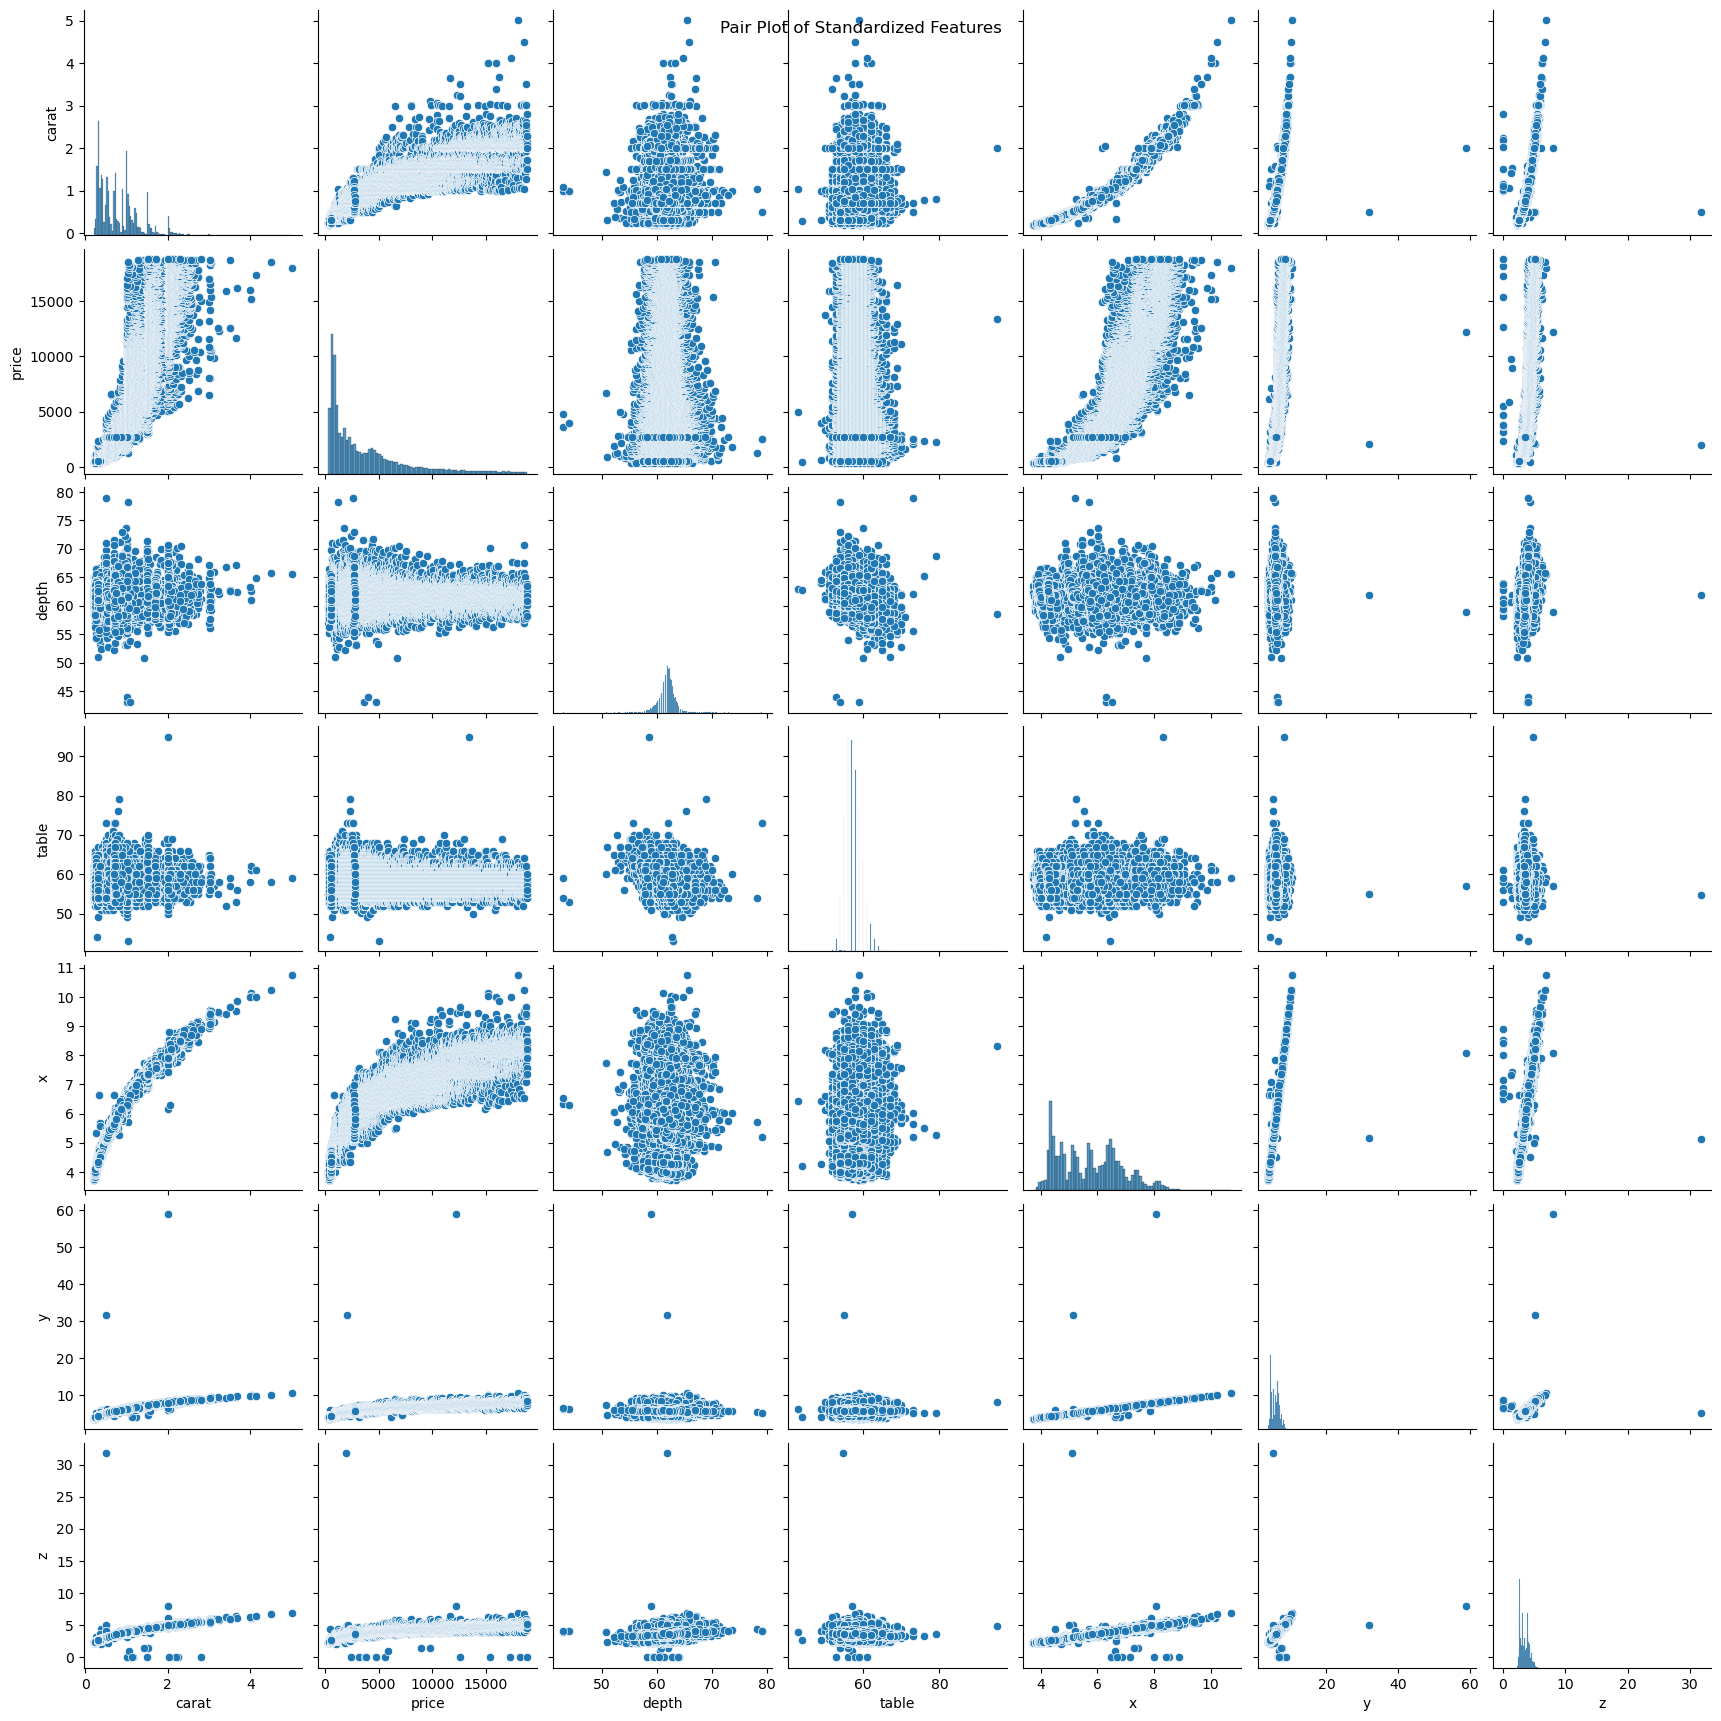

/Users/victorwintherlarsen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


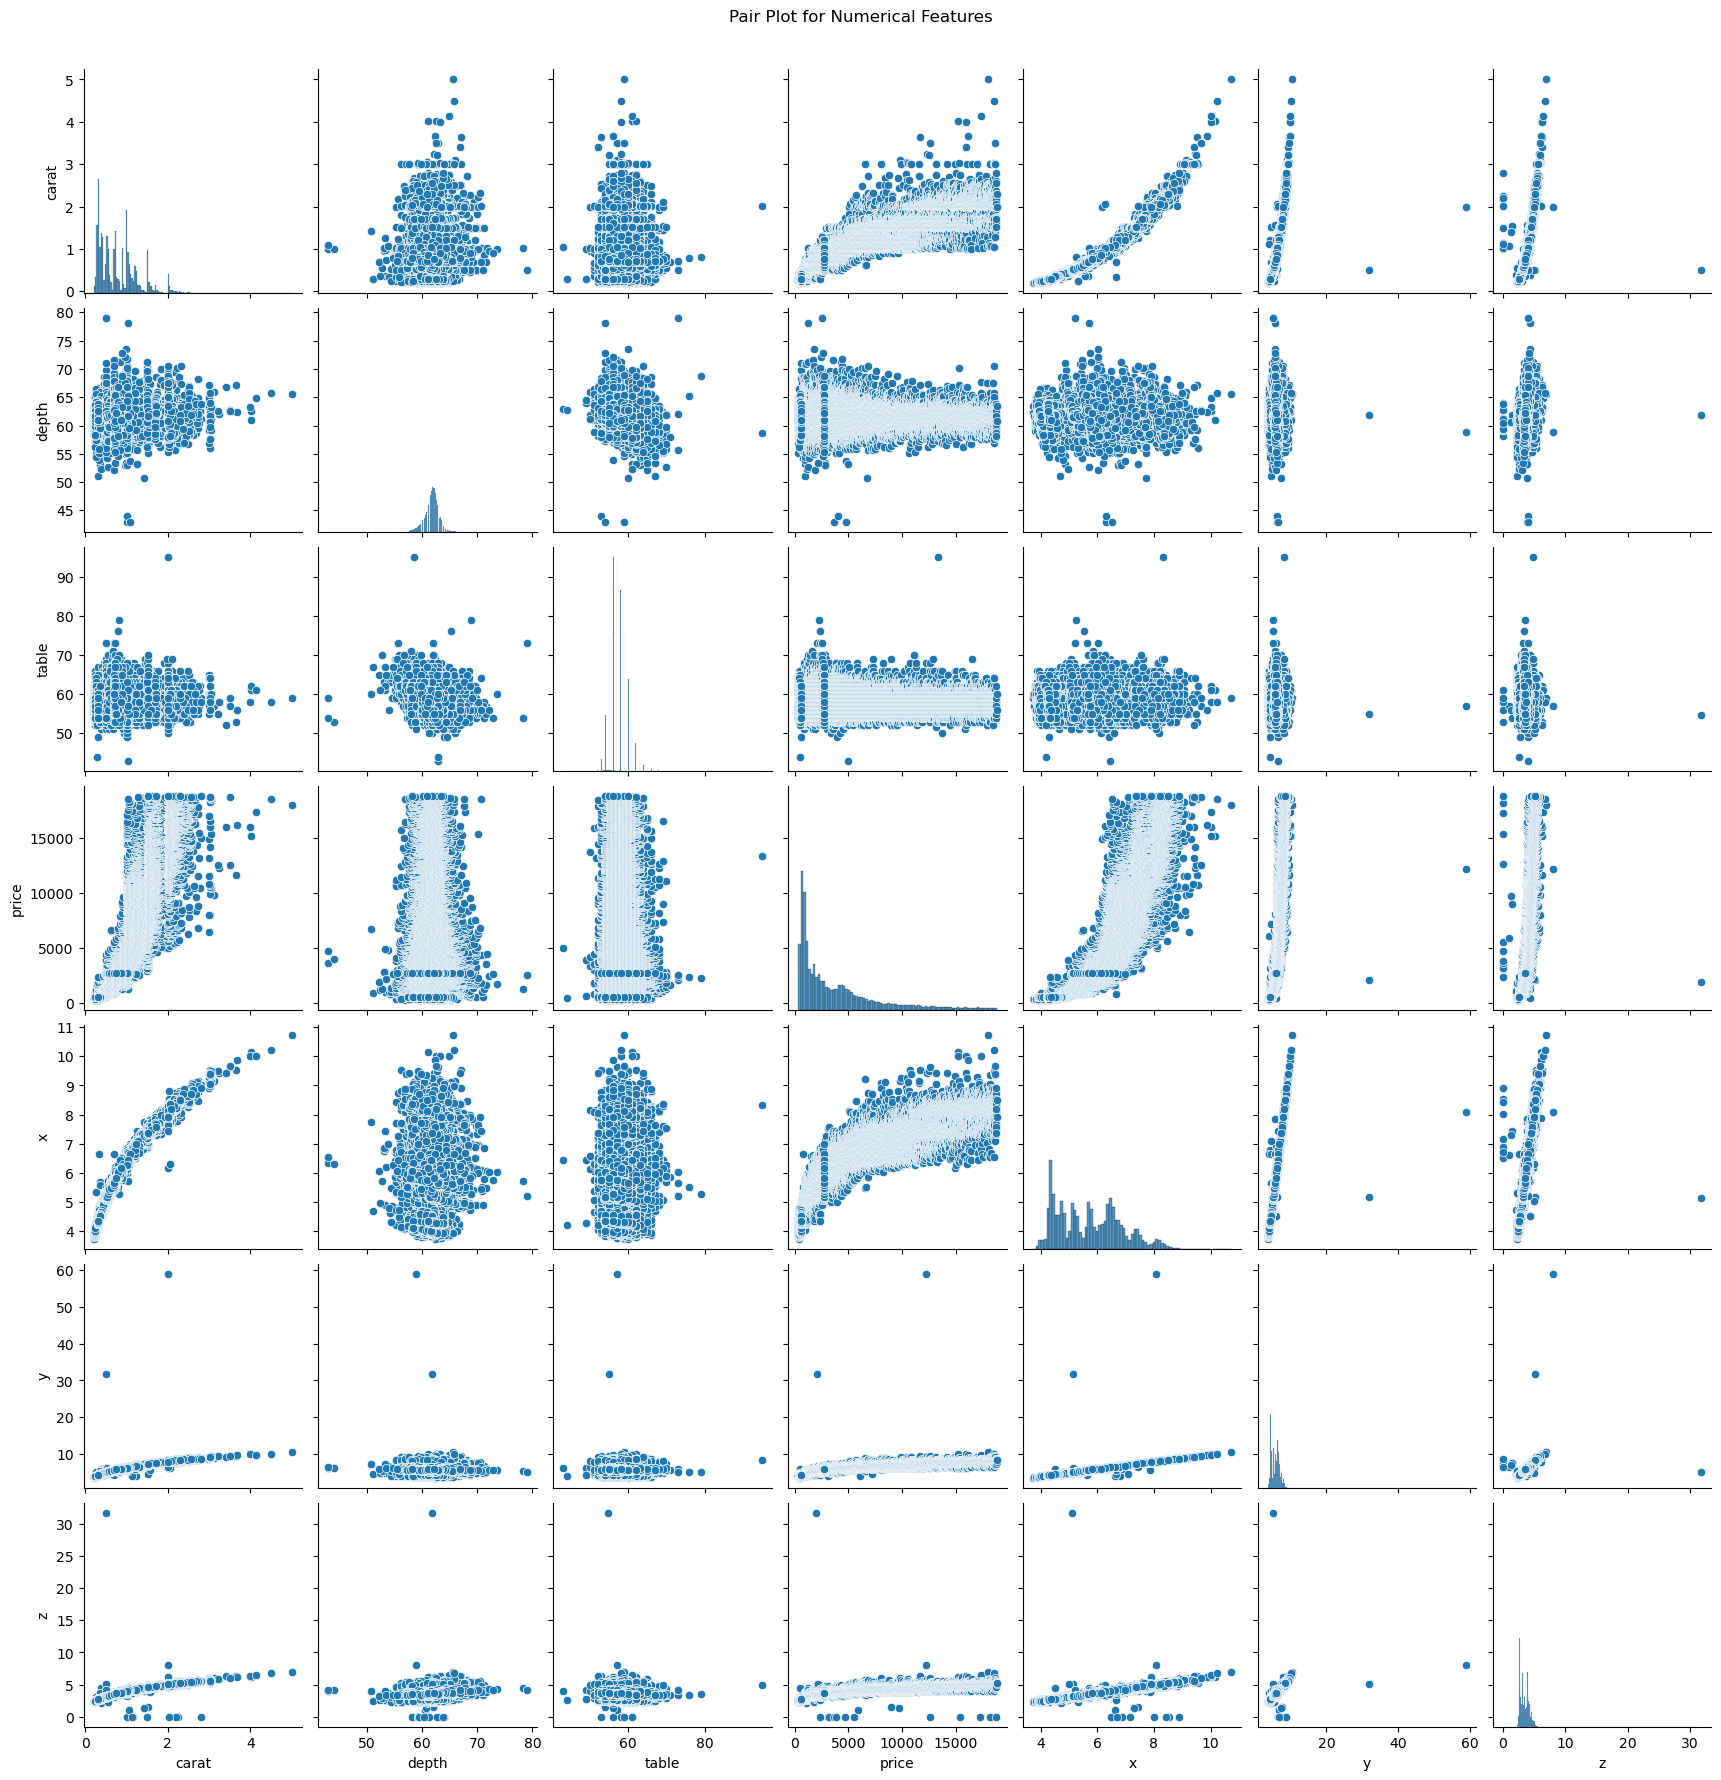

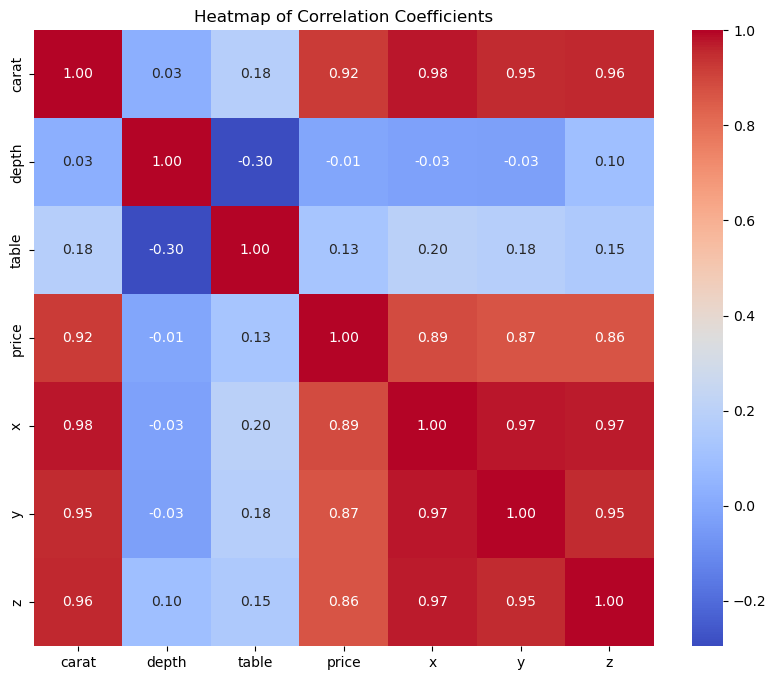

In [52]:
# Pair plot for selected standardized features
sns.pairplot(data[['carat', 'price', 'depth', 'table','x', 'y', 'z']])
plt.suptitle('Pair Plot of Standardized Features')
plt.show()


# Select the relevant numerical features for correlation analysis
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Generate the pair plot for the selected features
sns.pairplot(data[numerical_features])
plt.suptitle('Pair Plot for Numerical Features', y=1.02)  # Title with some vertical space
plt.show()


# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Coefficients')
plt.show()


# Outliers

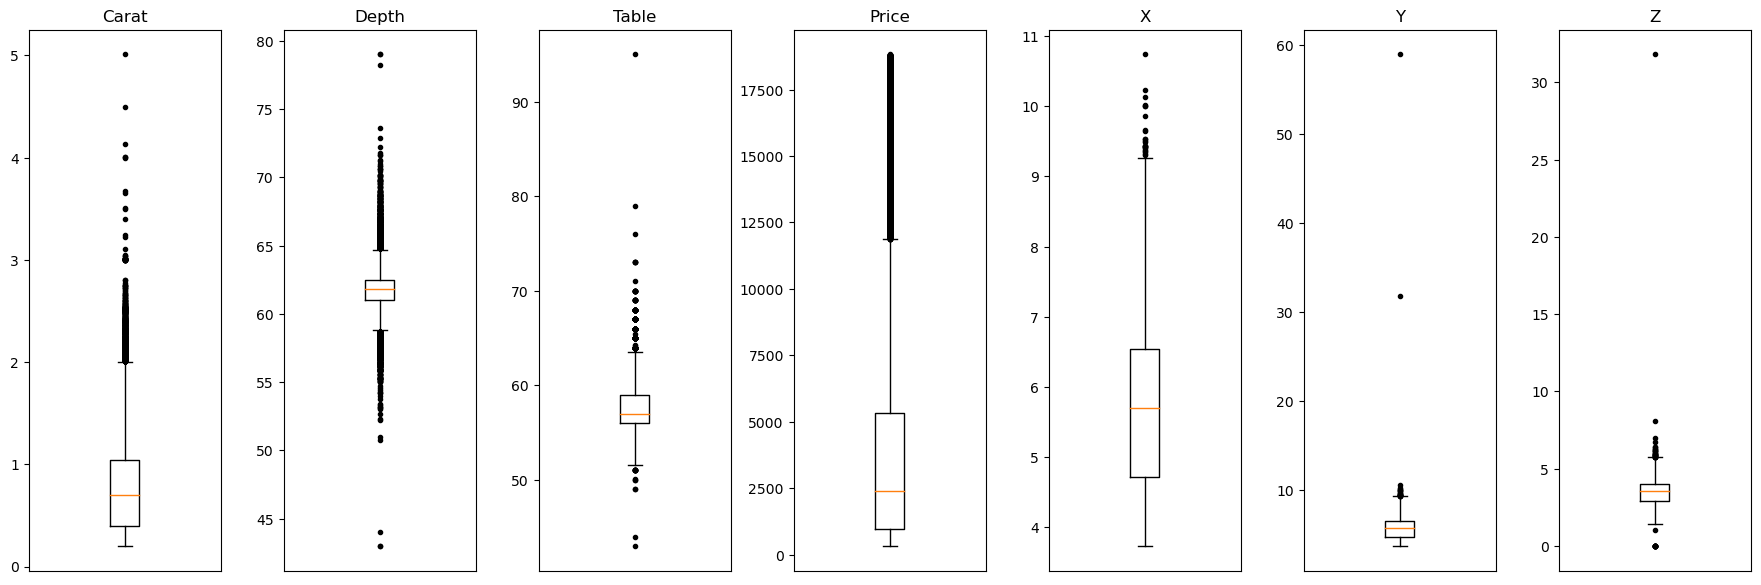

In [53]:
import matplotlib.pyplot as plt

# List of numerical columns from your dataset
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create subplots: 1 row and 7 columns (one for each numerical feature)
fig, axes = plt.subplots(1, 7, figsize=(18, 6))  # Removed 'sharey=True' to give each plot its own y-axis

# Adjust the layout to avoid overlap
fig.tight_layout()

# Create box plots for each numerical column and adjust their appearance
for ax, col in zip(axes, numerical_columns):
    ax.boxplot(data[col], sym="k.")  # sym="k." uses black dots for outliers
    ax.set_title(col.capitalize())  # Set the title to the column name
    ax.set_xticks([])  # Remove x-tick labels for a cleaner look

# Display the plots
plt.show()


### Encoding categorial values

In [54]:
data['cut_code'] = data['cut'].astype('category').cat.codes
data['color_code'] = data['color'].astype('category').cat.codes
data['clarity_code'] = data['clarity'].astype('category').cat.codes

In [55]:
data.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   cut_code  color_code  clarity_code  
0         2           1             3  
1         3           1             2  
2         1           1             4  
3         3           5             5  
4         1           6             3

#### Standardize the values

In [56]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the columns for standardization
numerical_features = ['carat', 'cut_code', 'color_code', 'clarity_code', 'depth', 'table', 'price', 'x', 'y', 'z']

# Initializing the StandardScaler
scaler = StandardScaler()

# Standardizing the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows to confirm standardization
print(data[numerical_features].head())


      carat  cut_code  color_code  clarity_code     depth     table     price  \
0 -1.198105 -0.538207   -0.937138     -0.484230 -0.174057 -1.099813 -0.904089   
1 -1.240300  0.434892   -0.937138     -1.064058 -1.360792  1.585901 -0.904089   
2 -1.198105 -1.511307   -0.937138      0.095599 -3.385224  3.376376 -0.903838   
3 -1.071517  0.434892    1.414214      0.675427  0.454215  0.243044 -0.902083   
4 -1.029322 -1.511307    2.002052     -0.484230  1.082487  0.243044 -0.901832   

          x         y         z  
0 -1.591562 -1.539248 -1.574696  
1 -1.645149 -1.662019 -1.745047  
2 -1.502249 -1.460323 -1.745047  
3 -1.368280 -1.320013 -1.290777  
4 -1.243242 -1.214781 -1.120426  


In [57]:
# Manualelt til thomas i stedet 
# Calculate the mean and standard deviation for each numerical feature
diamonds_data = pd.read_csv('../Data/diamonds.csv')

numerical_features1 = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

means = diamonds_data[numerical_features1].mean()
stds = diamonds_data[numerical_features1].std()

# Display the means and standard deviations
print("Means:\n", means)
print("\nStandard Deviations:\n", stds)

# Manually standardizing the numerical features
diamonds_data_standardized = diamonds_data[numerical_features1].copy()

for column in numerical_features1:
    diamonds_data_standardized[column] = (diamonds_data[column] - means[column]) / stds[column]

# Display the first few rows of the manually standardized data
print(diamonds_data_standardized.head())

Means:
 carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

Standard Deviations:
 carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64
      carat     depth     table     price         x         y         z
0 -1.198157 -0.174090 -1.099662 -0.904087 -1.587823 -1.536181 -1.571115
1 -1.240350 -1.360726  1.585514 -0.904087 -1.641310 -1.658759 -1.741159
2 -1.198157 -3.384987  3.375631 -0.903836 -1.498677 -1.457382 -1.741159
3 -1.071577  0.454129  0.242926 -0.902081 -1.364959 -1.317293 -1.287708
4 -1.029384  1.082348  0.242926 -0.901831 -1.240155 -1.212227 -1.117663


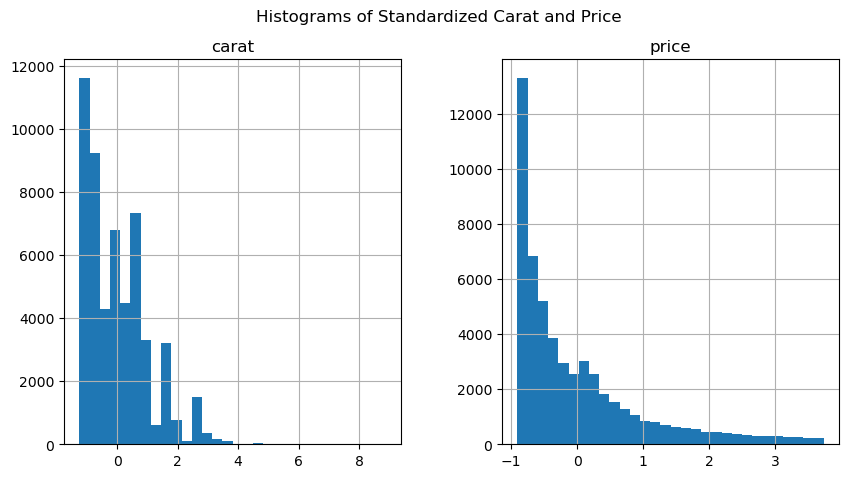

In [58]:
# Histograms for 'carat' and 'price' after standardization
data[['carat', 'price']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Histograms of Standardized Carat and Price')
plt.show()


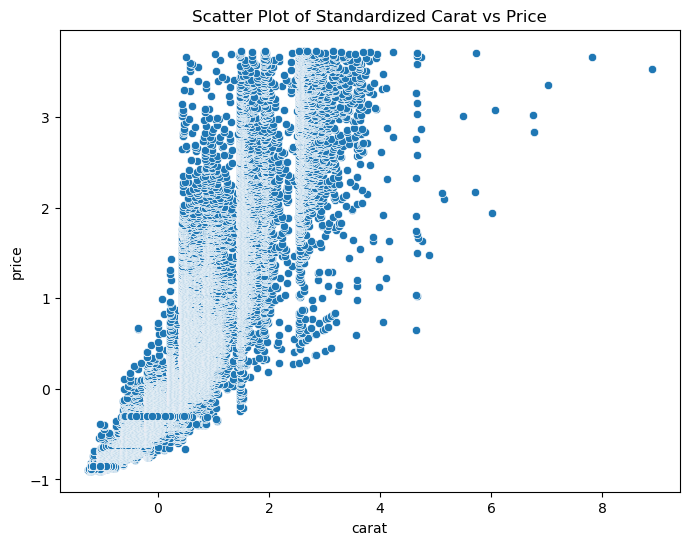

/Users/victorwintherlarsen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


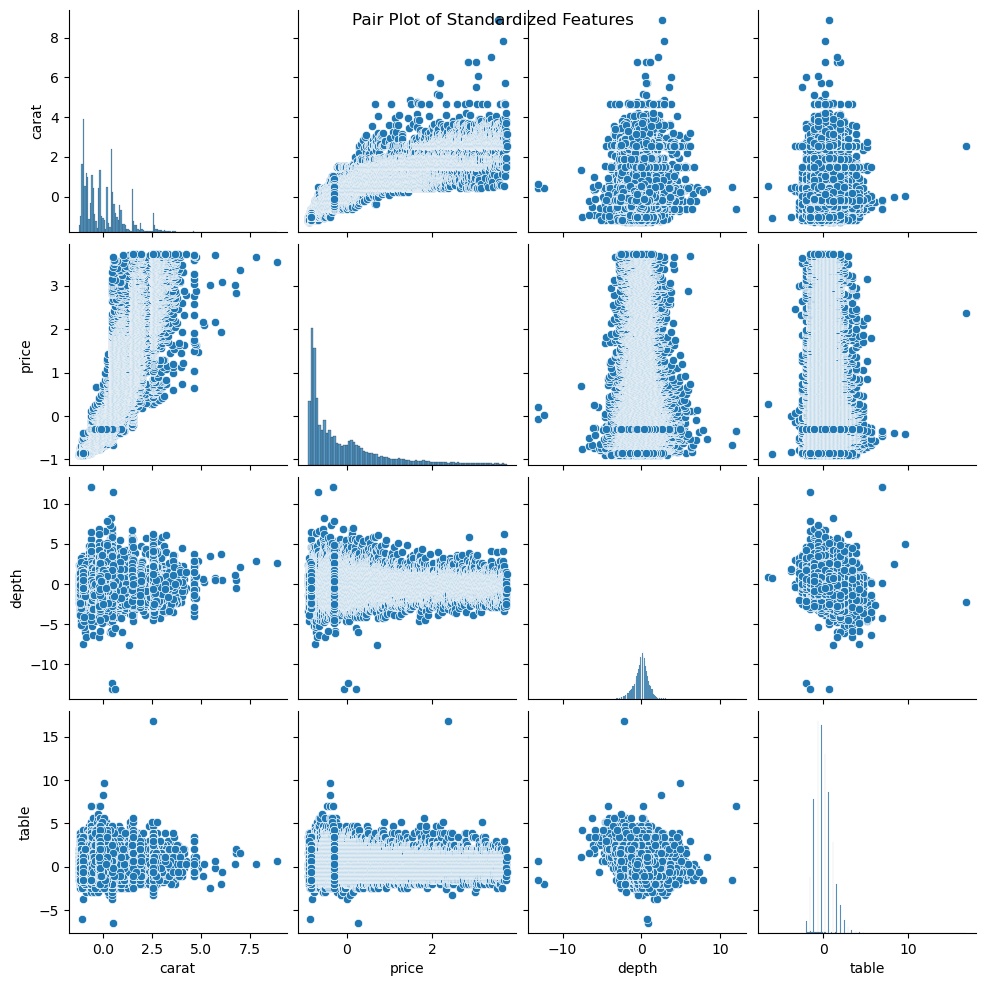

In [59]:
# Scatter plot between carat and price after standardization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=data)
plt.title('Scatter Plot of Standardized Carat vs Price')
plt.show()

# Pair plot for selected standardized features
sns.pairplot(data[['carat', 'price', 'depth', 'table']])
plt.suptitle('Pair Plot of Standardized Features')
plt.show()


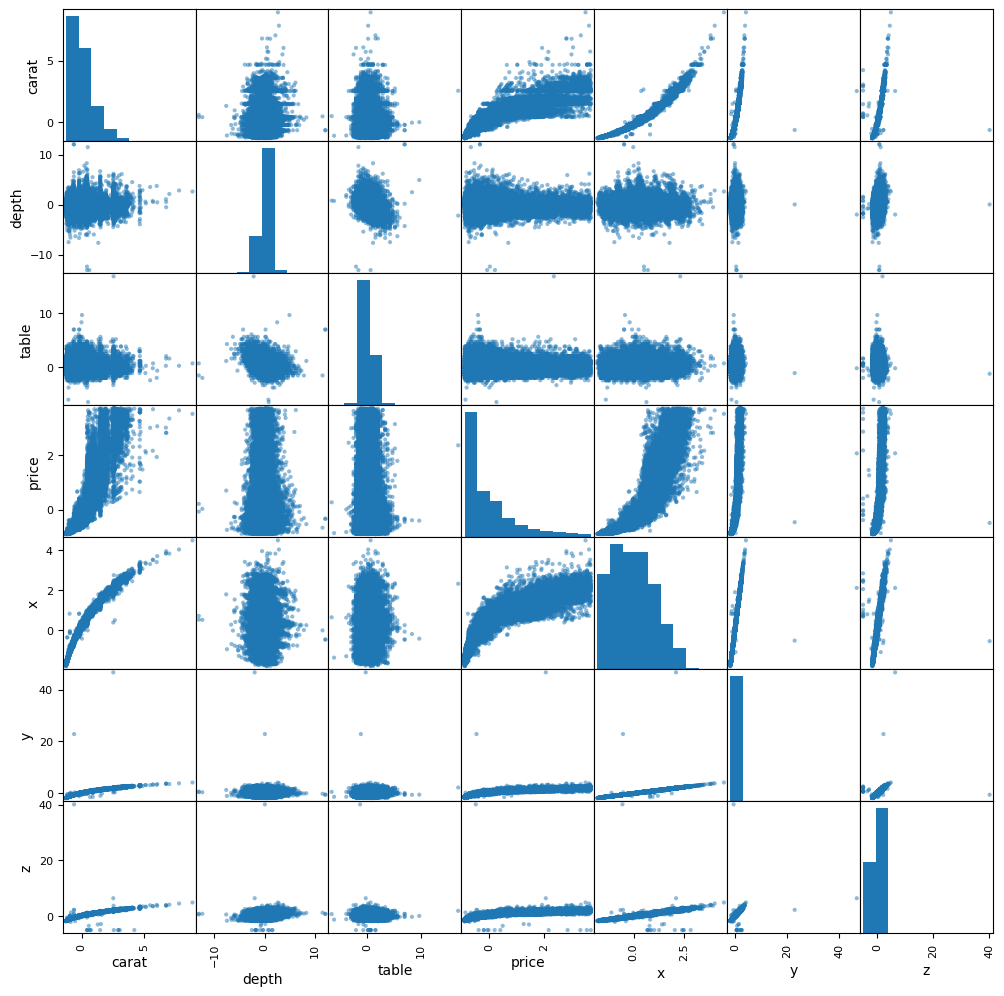

In [60]:
from pandas.plotting import scatter_matrix

# Create the scatter matrix plot
scatter_matrix(data[numerical_columns], figsize=(12, 12))
plt.show()

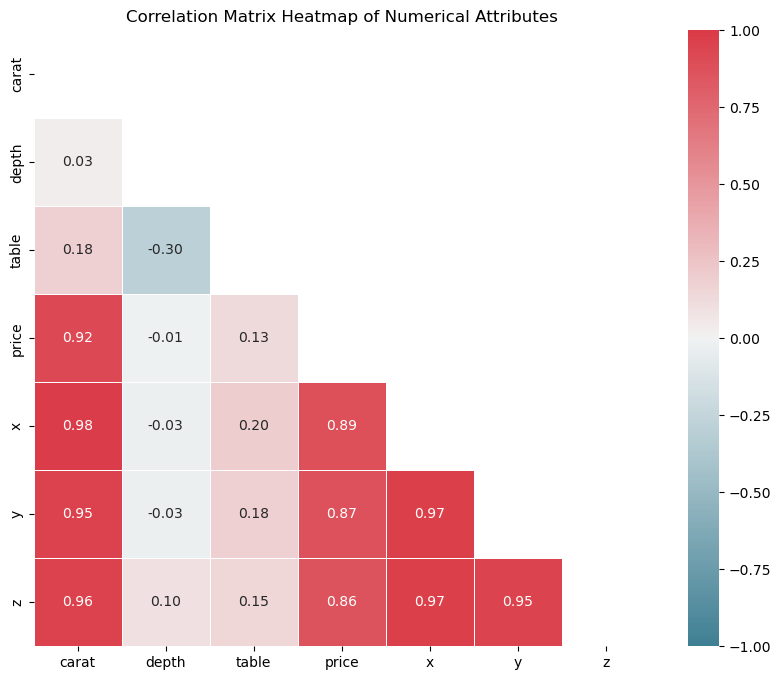

In [61]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr_matrix = data[numerical_columns].corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap (optional)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap=cmap, 
    vmax=1, 
    vmin=-1, 
    center=0,
    annot=True,     # Annotate cells with correlation coefficients
    fmt=".2f",      # Format annotations to two decimal places
    square=True, 
    linewidths=.5
)

# Set the title
plt.title('Correlation Matrix Heatmap of Numerical Attributes')

# Show the plot
plt.show()


### PCA

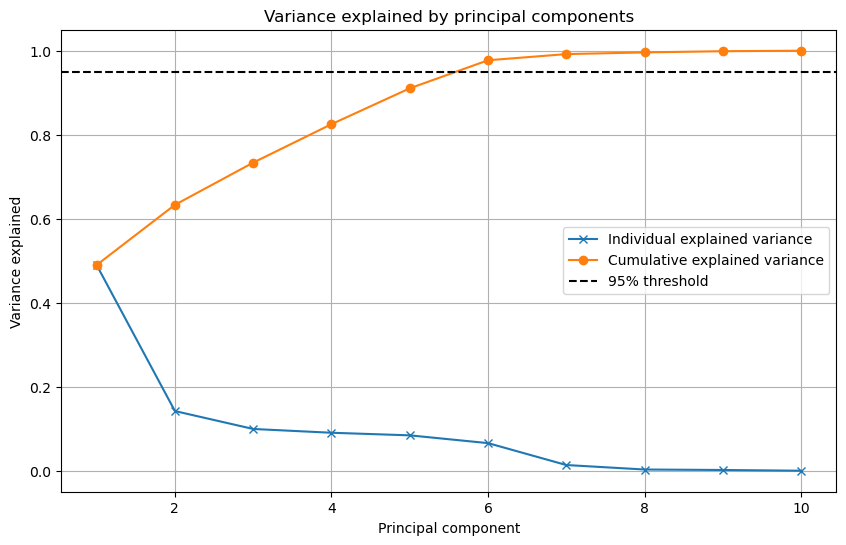

Number of components needed for 95% variance: 6


Principal Component  Variance Explained  Cumulative Variance Explained
0                 PC1            0.490382                       0.490382
1                 PC2            0.143054                       0.633436
2                 PC3            0.100432                       0.733868
3                 PC4            0.091433                       0.825301
4                 PC5            0.085269                       0.910570
5                 PC6            0.066752                       0.977322
6                 PC7            0.014649                       0.991971
7                 PC8            0.004003                       0.995974
8                 PC9            0.002892                       0.998866
9                PC10            0.001134                       1.000000

In [62]:
from scipy.linalg import svd

# Step 4: Perform PCA using SVD
U, S, Vt = svd(data[numerical_features], full_matrices=False)

# Step 5: Compute the variance explained by each principal component
rho = (S ** 2) / np.sum(S ** 2)

# Step 6: Plot the variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rho) + 1), rho, 'x-', label='Individual explained variance')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), 'o-', label='Cumulative explained variance')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% threshold')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend()
plt.grid(True)
plt.show()

# Number of components needed for 95% variance explained
num_components_for_95 = np.argmax(np.cumsum(rho) >= 0.95) + 1
print(f"Number of components needed for 95% variance: {num_components_for_95}")


# Table to display the variance explained and cumulative variance
# Step 7: Create a DataFrame to display the variance explained and cumulative variance
variance_data = {
    'Principal Component': [f'PC{i+1}' for i in range(len(rho))],
    'Variance Explained': rho,
    'Cumulative Variance Explained': np.cumsum(rho)
}

# Create the DataFrame
variance_df = pd.DataFrame(variance_data)

# display the entire table
display(variance_df)

In [63]:
# Principal directions (Vt contains the directions of the PCs)
print("Principal directions (Vt):\n", Vt)

# To make it more interpretable, let's create a DataFrame to display how each feature contributes to each PC
pc_df = pd.DataFrame(Vt.T, index=numerical_features, columns=[f'PC{i+1}' for i in range(Vt.shape[0])])
pc_df



Principal directions (Vt):
 [[ 4.46304560e-01  1.48824375e-02  1.44106075e-01 -1.10995166e-01
   1.72501370e-03  9.84999396e-02  4.13795166e-01  4.46550822e-01
   4.40460213e-01  4.39499462e-01]
 [-2.73556369e-02  4.92209280e-01 -9.92781507e-02  5.00733712e-02
  -6.47008837e-01  5.65930013e-01 -4.92081490e-03  5.12048334e-03
   6.45605541e-03 -7.50257955e-02]
 [ 2.44065391e-02  2.13819637e-01  3.14878616e-01  8.77821790e-01
  -3.90154928e-02 -2.50615212e-01  1.39871644e-01  2.04531325e-03
   8.17165034e-03  7.85436978e-04]
 [-4.19439150e-02  1.24083741e-01  9.11465049e-01 -2.83005972e-01
   5.26761151e-02  1.27834339e-01 -2.09945075e-01 -5.38302325e-02
  -5.78011074e-02 -5.05077189e-02]
 [-4.77382337e-03 -8.30540863e-01  1.50972982e-01  2.37539686e-01
  -3.21933096e-01  3.54615271e-01 -1.47749912e-02  1.01932592e-02
   3.87882570e-03 -3.50854031e-02]
 [-1.48791505e-03 -7.83703650e-02  7.98768987e-02 -2.37942165e-01
  -6.79550199e-01 -6.80038073e-01  2.20984345e-02  4.01830604e-02
   5.

PC1       PC2       PC3       PC4       PC5       PC6  \
carat         0.446305 -0.027356  0.024407 -0.041944 -0.004774 -0.001488   
cut_code      0.014882  0.492209  0.213820  0.124084 -0.830541 -0.078370   
color_code    0.144106 -0.099278  0.314879  0.911465  0.150973  0.079877   
clarity_code -0.110995  0.050073  0.877822 -0.283006  0.237540 -0.237942   
depth         0.001725 -0.647009 -0.039015  0.052676 -0.321933 -0.679550   
table         0.098500  0.565930 -0.250615  0.127834  0.354615 -0.680038   
price         0.413795 -0.004921  0.139872 -0.209945 -0.014775  0.022098   
x             0.446551  0.005120  0.002045 -0.053830  0.010193  0.040183   
y             0.440460  0.006456  0.008172 -0.057801  0.003879  0.052790   
z             0.439499 -0.075026  0.000785 -0.050508 -0.035085 -0.041581   

                   PC7       PC8       PC9      PC10  
carat        -0.094948 -0.089686 -0.732241  0.494417  
cut_code      0.019715 -0.002109 -0.007439 -0.002098  
color_code   -0.087807  0.006338  0.046912 -0.018333  
clarity_code  0.141203 -0.006241 -0.037978  0.006938  
depth        -0.023284  0.088938 -0.019365 -0.053132  
table        -0.044321  0.008964  0.024745 -0.003246  
price        -0.814045  0.045199  0.297221 -0.106531  
x             0.237231 -0.077240 -0.290417 -0.805828  
y             0.353938  0.755671  0.260537  0.188555  
z             0.340912 -0.636266  0.467520  0.236789

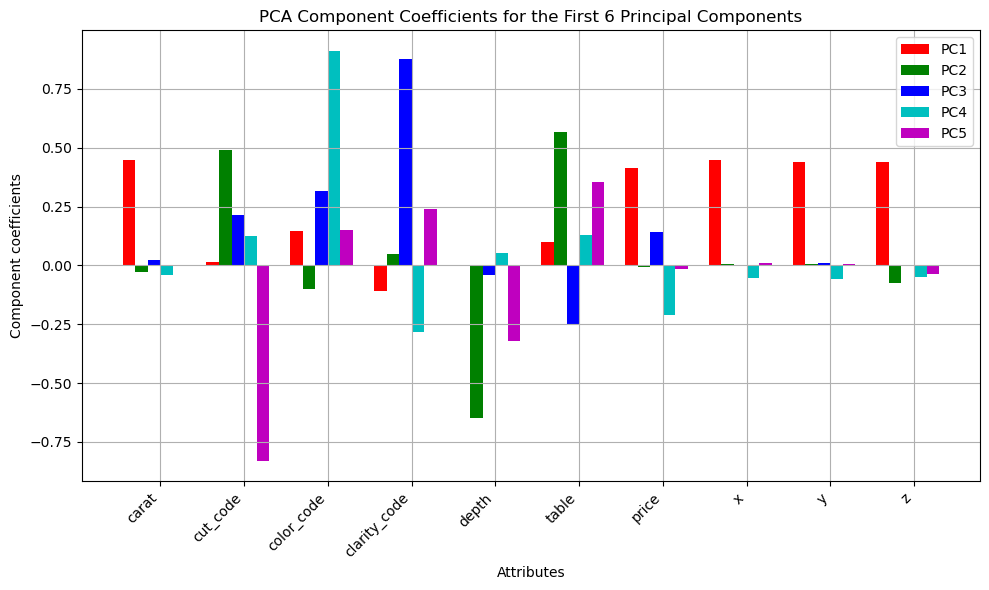

PC2 coefficients:
 [-0.02735564  0.49220928 -0.09927815  0.05007337 -0.64700884  0.56593001
 -0.00492081  0.00512048  0.00645606 -0.0750258 ]


In [64]:
# Transpose Vt to get the principal component directions (V)
V = Vt.T

# Step 6: Select the first 6 principal components
pcs = [0, 1, 2, 3, 4]  # First 6 principal components

# Prepare for plotting
M = data[numerical_features].shape[1]  # Number of features
attribute_names = numerical_features  # List of feature names
legend_strs = [f"PC{e+1}" for e in pcs]  # Labels for the PCs
bw = 0.15  # Bar width
r = np.arange(1, M + 1)  # X positions for the bars
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Colors for each PC

# Plot the coefficients for the first 6 principal components
plt.figure(figsize=(10, 6))
for i, pc in enumerate(pcs):
    plt.bar(r + i * bw, V[:, pc], width=bw, color=colors[i], label=f"PC{pc+1}")

# Add labels, grid, and legend
plt.xticks(r + bw * 2.5, attribute_names, rotation=45, ha="right")
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.title("PCA Component Coefficients for the First 6 Principal Components")
plt.legend(legend_strs)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# (Optional) Print the coefficients for a specific principal component, e.g., PC2
print("PC2 coefficients:\n", V[:, 1])

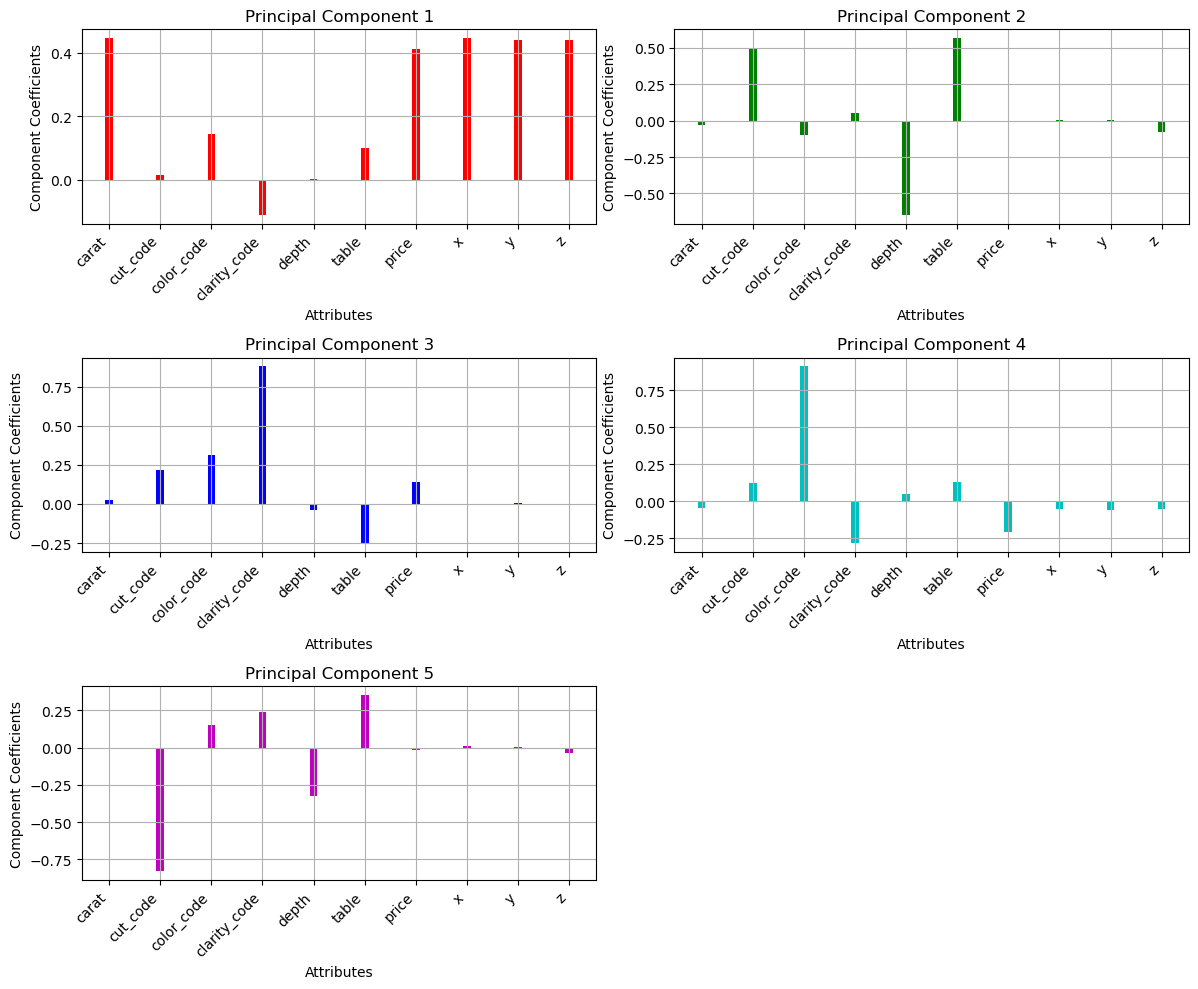

In [65]:
# Plot the coefficients for the first 6 principal components in subplots
plt.figure(figsize=(12, 10))

for i, pc in enumerate(pcs):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns layout for subplots
    plt.bar(r, V[:, pc], color=colors[i], width=bw)
    plt.xticks(r, attribute_names, rotation=45, ha="right")
    plt.title(f"Principal Component {pc+1}")
    plt.xlabel("Attributes")
    plt.ylabel("Component Coefficients")
    plt.grid(True)

plt.tight_layout()
plt.show()


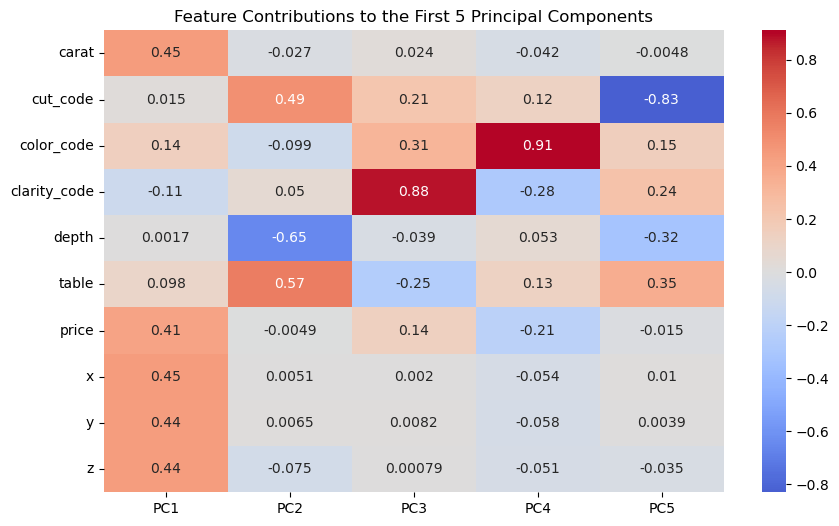

In [66]:
# Create a DataFrame for easy plotting with Seaborn
pc_contributions = pd.DataFrame(V[:, pcs], index=attribute_names, columns=[f"PC{i+1}" for i in pcs])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pc_contributions, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Contributions to the First 5 Principal Components")
plt.show()

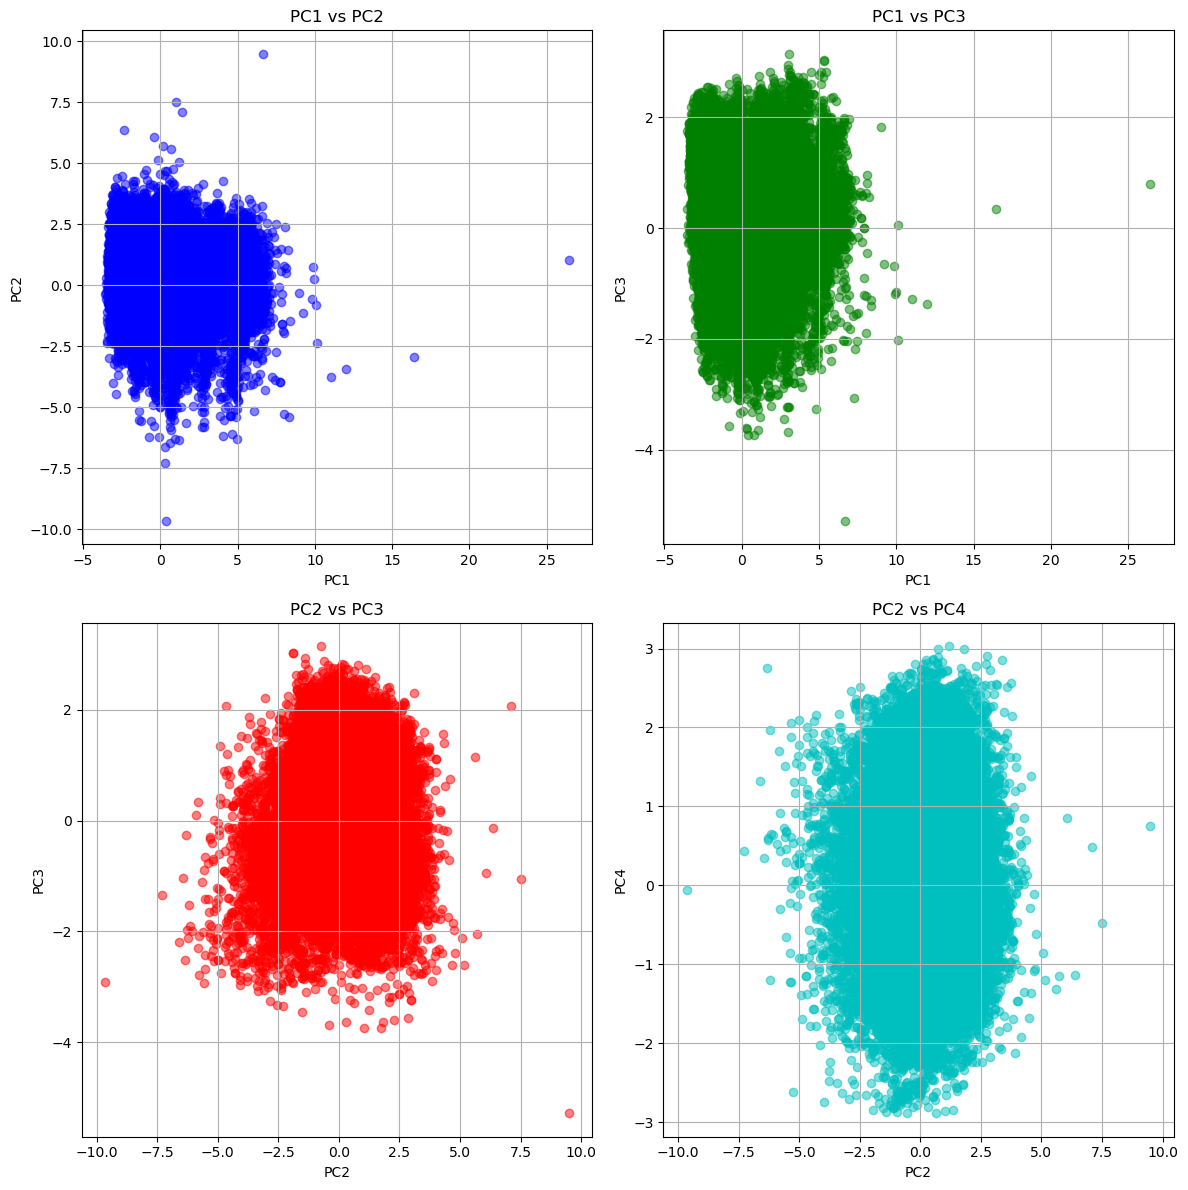

In [67]:
# Step 1: Project the data onto the first few principal components
Z = np.dot(data[numerical_features] - np.mean(data[numerical_features], axis=0), V[:, pcs])

# Step 2: Create scatter plots for different principal component pairs
plt.figure(figsize=(12, 12))

# PC1 vs PC2
plt.subplot(2, 2, 1)
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5, c='b')  # PC1 vs PC2
plt.title("PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# PC1 vs PC3
plt.subplot(2, 2, 2)
plt.scatter(Z[:, 0], Z[:, 2], alpha=0.5, c='g')  # PC1 vs PC3
plt.title("PC1 vs PC3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.grid(True)

# PC2 vs PC3
plt.subplot(2, 2, 3)
plt.scatter(Z[:, 1], Z[:, 2], alpha=0.5, c='r')  # PC2 vs PC3
plt.title("PC2 vs PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.grid(True)

# PC2 vs PC4
plt.subplot(2, 2, 4)
plt.scatter(Z[:, 1], Z[:, 3], alpha=0.5, c='c')  # PC2 vs PC4
plt.title("PC2 vs PC4")
plt.xlabel("PC2")
plt.ylabel("PC4")
plt.grid(True)

plt.tight_layout()
plt.show()

/var/folders/tr/pbspb0ys4jxcsscs6_vhlw_00000gn/T/ipykernel_84369/1208967932.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(cut_categories)).colors  # Adjust colormap as needed


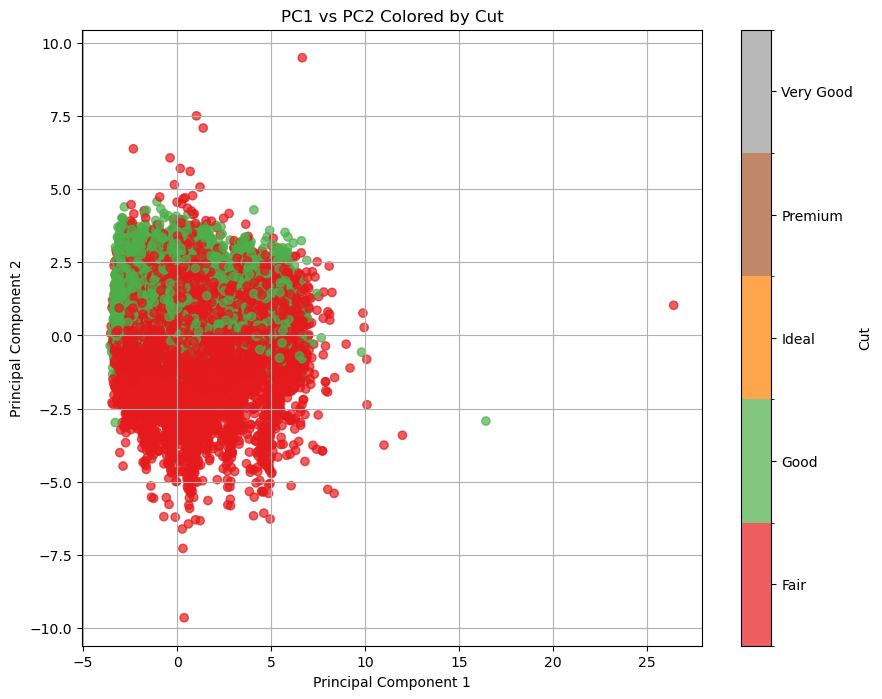

/var/folders/tr/pbspb0ys4jxcsscs6_vhlw_00000gn/T/ipykernel_84369/1208967932.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', len(color_categories)).colors


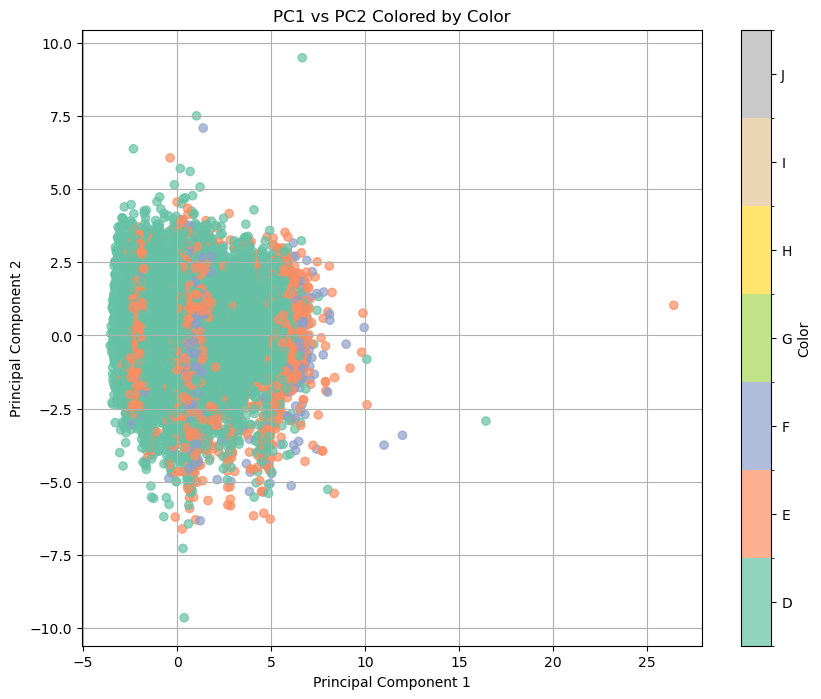

/var/folders/tr/pbspb0ys4jxcsscs6_vhlw_00000gn/T/ipykernel_84369/1208967932.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(clarity_categories)).colors


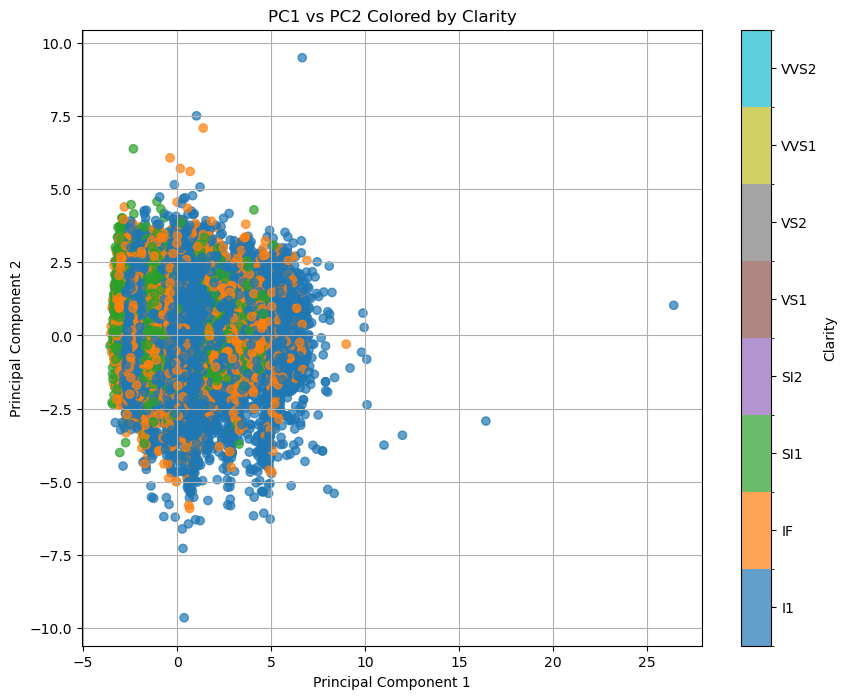

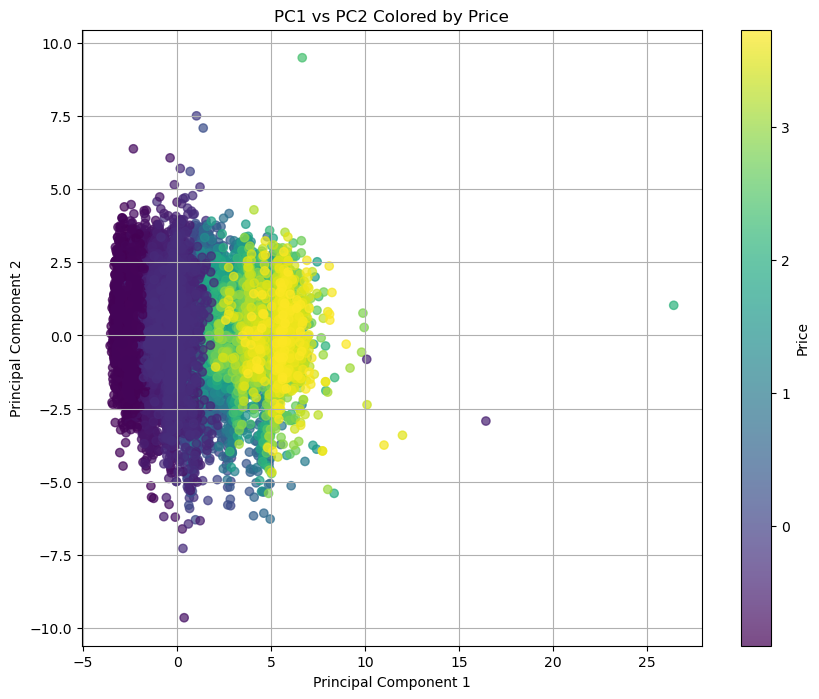

In [68]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Get the unique codes and corresponding categories
cut_categories = data['cut'].astype('category').cat.categories
cut_codes = data['cut_code']

# Create a color palette
colors = plt.cm.get_cmap('Set1', len(cut_categories)).colors  # Adjust colormap as needed

# Create a colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, len(cut_categories)+0.5), len(cut_categories))

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=cut_codes, cmap=cmap, norm=norm, alpha=0.7)
plt.title("PC1 vs PC2 Colored by Cut")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Create a colorbar with the category labels
cbar = plt.colorbar(scatter, ticks=range(len(cut_categories)))
cbar.ax.set_yticklabels(cut_categories)
cbar.set_label('Cut')

plt.grid(True)
plt.show()

# Get the unique codes and categories
color_categories = data['color'].astype('category').cat.categories
color_codes = data['color_code']

# Create color palette
colors = plt.cm.get_cmap('Set2', len(color_categories)).colors

# Colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, len(color_categories)+0.5), len(color_categories))

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=color_codes, cmap=cmap, norm=norm, alpha=0.7)
plt.title("PC1 vs PC2 Colored by Color")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Colorbar
cbar = plt.colorbar(scatter, ticks=range(len(color_categories)))
cbar.ax.set_yticklabels(color_categories)
cbar.set_label('Color')

plt.grid(True)
plt.show()


# Get the unique codes and categories
clarity_categories = data['clarity'].astype('category').cat.categories
clarity_codes = data['clarity_code']

# Create color palette
colors = plt.cm.get_cmap('tab10', len(clarity_categories)).colors

# Colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, len(clarity_categories)+0.5), len(clarity_categories))

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=clarity_codes, cmap=cmap, norm=norm, alpha=0.7)
plt.title("PC1 vs PC2 Colored by Clarity")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Colorbar
cbar = plt.colorbar(scatter, ticks=range(len(clarity_categories)))
cbar.ax.set_yticklabels(clarity_categories)
cbar.set_label('Clarity')

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=data['price'], cmap='viridis', alpha=0.7)
plt.title("PC1 vs PC2 Colored by Price")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
cbar = plt.colorbar(scatter)
cbar.set_label('Price')
plt.grid(True)
plt.show()


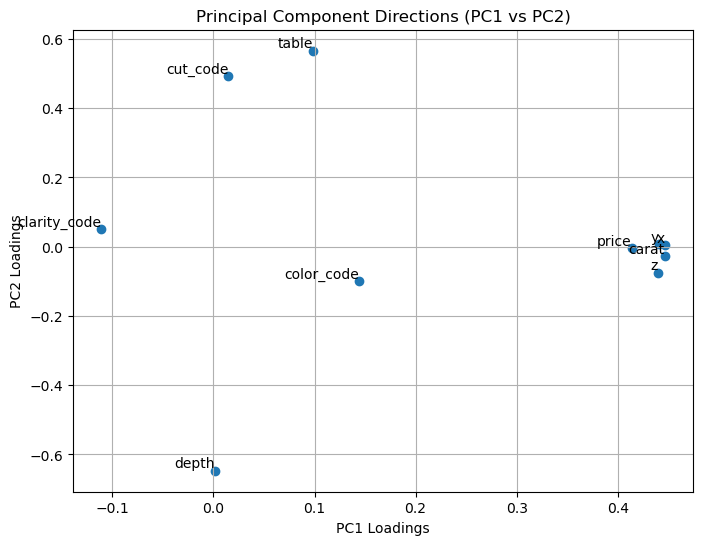

In [69]:
# Get the loadings (directions) for PC1 and PC2 from the V matrix
pc1_loadings = V[:, 0]  # PC1 loadings (1st column of V)
pc2_loadings = V[:, 1]  # PC2 loadings (2nd column of V)

# Plot PC1 loadings vs. PC2 loadings
plt.figure(figsize=(8, 6))

# Create scatter plot for loadings
plt.scatter(pc1_loadings, pc2_loadings)

# Add labels for each feature
for i, feature in enumerate(attribute_names):
    plt.text(pc1_loadings[i], pc2_loadings[i], feature, ha='right', va='bottom', fontsize=10)

# Add axis labels and title
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Principal Component Directions (PC1 vs PC2)')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

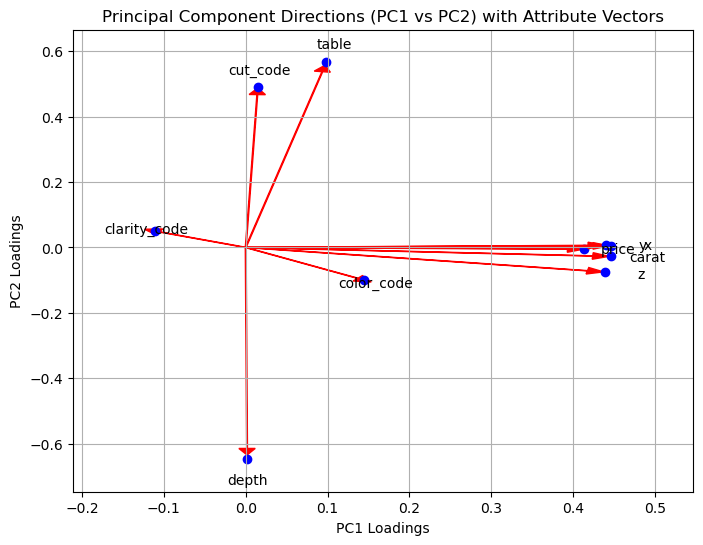

In [70]:
# Factor to scale the arrows slightly smaller so they don't overlap with the dots
scaling_factor = 0.95

# Plot PC1 loadings vs. PC2 loadings
plt.figure(figsize=(8, 6))

# Add vectors (arrows) for each attribute from the origin (0, 0) to slightly shorter than (PC1 loading, PC2 loading)
for i, feature in enumerate(attribute_names):
    # Draw the arrows (scale them by the scaling_factor)
    plt.arrow(0, 0, pc1_loadings[i] * scaling_factor, pc2_loadings[i] * scaling_factor, 
              head_width=0.02, head_length=0.02, fc='r', ec='r')

    # Draw the points (dots) where the arrows would end
    plt.scatter(pc1_loadings[i], pc2_loadings[i], color='b')  # Use blue color for dots

    # Add text labels for each feature
    plt.text(pc1_loadings[i] * 1.1, pc2_loadings[i] * 1.1, feature, ha='center', va='center', fontsize=10)

# Set the limits for the plot to make sure arrows fit well
plt.xlim(min(pc1_loadings) - 0.1, max(pc1_loadings) + 0.1)
plt.ylim(min(pc2_loadings) - 0.1, max(pc2_loadings) + 0.1)

# Add axis labels and title
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Principal Component Directions (PC1 vs PC2) with Attribute Vectors')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()